<a href="https://colab.research.google.com/github/eshghinezhad/BackendAPI-RenderDeployment-MediaManagement/blob/main/MAI101_A1_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
#from sklearn import linear_model


In [17]:
student = pd.read_csv("MAI101 W26 A1 data v0.1.csv")
student.head()

,program,duration,status,gender,LangTestPercent,MathTestPercent,AptitudeTestPercent,transfer_in,totalSemesters,probationTerms,maxGap,finished,Business101 Grade,Math101 Grade,Mature,Overall Average Grade,hasGraduated
0,ACCOUNTING,4,I,M,15.3,95.5,85.8,0,3,1,0,0,83.2,UNSAT,0,64.7,0
1,ACCOUNTING,4,I,M,NaN,87.9,94.3,1,2,0,0,0,83.2,UNSAT,0,81.9,0
2,ACCOUNTING,4,I,M,33.4,71.6,77.9,1,2,1,4,1,48.5,UNSAT,1,47.9,0
3,ACCOUNTING,4,D,F,59.0,30.0,3.7,0,3,0,0,0,87.3,SAT,0,82.4,0
4,ACCOUNTING,4,I,F,NaN,NaN,NaN,1,1,0,12,1,47.5,UNSAT,1,47.3,0


 > #### show column names, data types, and `missing values`

In [18]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   program                1677 non-null   object 
 1   duration               1677 non-null   int64  
 2   status                 1677 non-null   object 
 3   gender                 1677 non-null   object 
 4   LangTestPercent        1534 non-null   float64
 5   MathTestPercent        1538 non-null   float64
 6   AptitudeTestPercent    1535 non-null   float64
 7   transfer_in            1677 non-null   int64  
 8   totalSemesters         1677 non-null   int64  
 9   probationTerms         1677 non-null   int64  
 10  maxGap                 1677 non-null   int64  
 11  finished               1677 non-null   int64  
 12  Business101 Grade      1674 non-null   float64
 13  Math101 Grade          1677 non-null   object 
 14  Mature                 1677 non-null   int64  
 15  Over


> #### Count how many Missing (NaN) Values each column has

In [19]:
student.isnull().sum()

,0
program,0
duration,0
status,0
gender,0
LangTestPercent,143
MathTestPercent,139
AptitudeTestPercent,142
transfer_in,0
totalSemesters,0
probationTerms,0


In [20]:
student.describe()   # shows basic statistics for numeric columns

,duration,LangTestPercent,MathTestPercent,AptitudeTestPercent,transfer_in,totalSemesters,probationTerms,maxGap,finished,Business101 Grade,Mature,Overall Average Grade,hasGraduated
count,1677.000000,1534.000000,1538.000000,1535.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1674.000000,1677.000000,1675.000000,1677.000000
mean,3.446035,49.497718,49.451170,49.415440,0.355993,4.060823,0.305307,2.159213,0.710793,71.780048,0.537269,72.220896,0.392964
std,0.497227,28.925821,28.853557,28.931004,0.478956,2.455061,0.601154,2.891689,0.453529,14.276541,0.498758,11.296100,0.488555
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000,47.000000,0.000000
25%,3.000000,24.100000,24.600000,24.600000,0.000000,2.000000,0.000000,0.000000,0.000000,62.325000,0.000000,65.650000,0.000000
50%,3.000000,49.300000,49.400000,49.400000,0.000000,4.000000,0.000000,0.000000,1.000000,73.650000,1.000000,74.900000,0.000000
75%,4.000000,73.800000,74.400000,74.700000,1.000000,6.000000,0.000000,4.000000,1.000000,83.500000,1.000000,80.850000,1.000000
max,4.000000,99.900000,99.000000,99.200000,1.000000,18.000000,6.000000,12.000000,1.000000,147.300000,1.000000,88.900000,1.000000


In [23]:
student.describe(include="object")     #shows summary info for text/categorical columns

,program,status,gender,Math101 Grade
count,1677,1677,1677,1677
unique,8,5,2,2
top,BOOKKEEPING,D,M,SAT
freq,388,1241,1055,1156


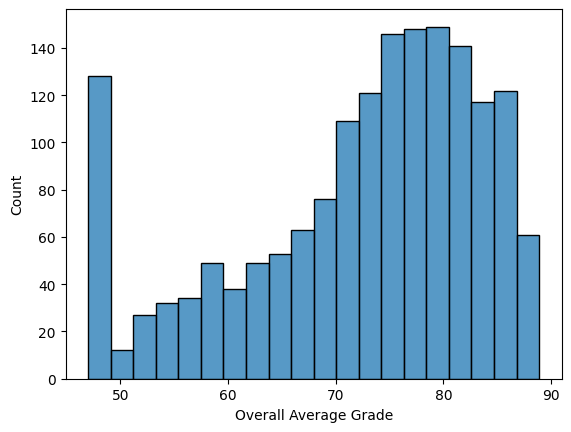

In [26]:
sns.histplot(student["Overall Average Grade"], bins=20)
plt.show()

histogram plot for 'OverallAverageGrade' provides a visual summary of the distribution of student grades to understand the underlying characteristics of a this numerical variable

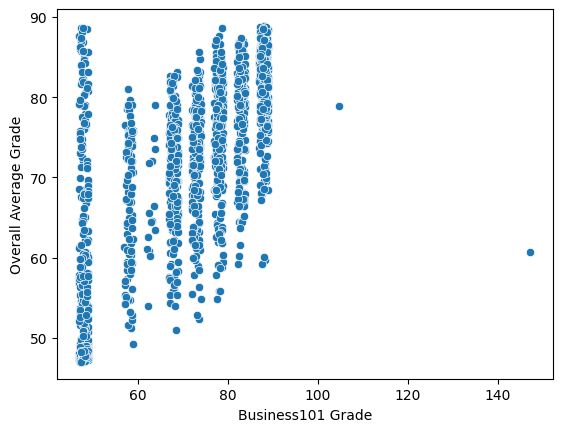

In [29]:
sns.scatterplot(
    x=student["Business101 Grade"],
    y=student["Overall Average Grade"]
)
plt.show()

It shows elationship between a student's 'Business101 Grade' and their 'Overall Average Grade'.

For understanding the relationship between a binary categorical variable (like `gender`) and a continuous numerical variable (`OverallAverageGrade`), you'd typically use plots that show the *distribution* of the numerical variable for each category. Here are some effective options:

1.  **Box Plot (`sns.boxplot`)**: This is an excellent choice. It clearly displays the median, quartiles, and potential outliers of `OverallAverageGrade` for each `gender` group. You can easily compare the central tendency, spread, and skewness of grades between males and females.
2.  **Violin Plot (`sns.violinplot`)**: Similar to a box plot, but it also shows the density distribution of the data, providing a richer view of where the grades are concentrated within each gender group.
3.  **Bar Plot (with mean/median) (`sns.barplot` with `estimator=np.mean` or `np.median`)**: If you just want to compare the average (or median) `OverallAverageGrade` for each gender, a bar plot can be useful. It often includes error bars to show the variability.

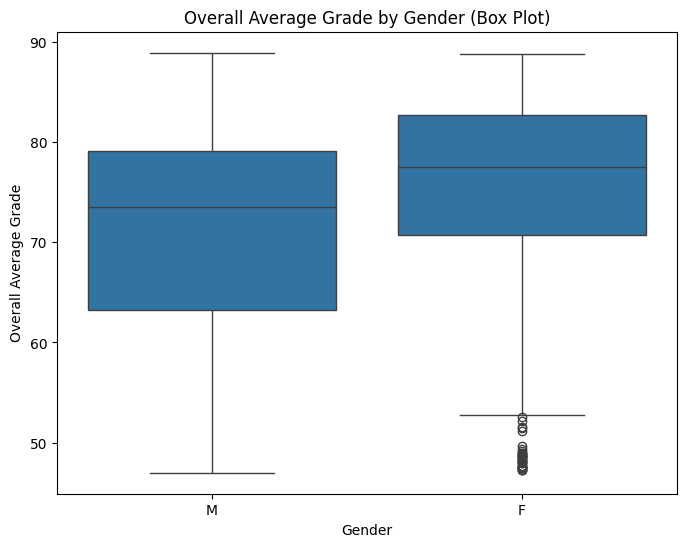

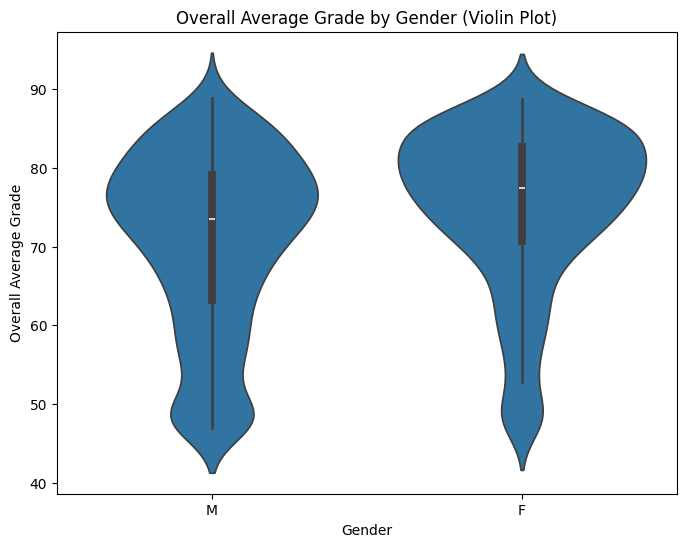

In [32]:

# Example using a Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='Overall Average Grade', data=student)
plt.title('Overall Average Grade by Gender (Box Plot)')
plt.xlabel('Gender')
plt.ylabel('Overall Average Grade')
plt.show()

# Example using a Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='gender', y='Overall Average Grade', data=student)
plt.title('Overall Average Grade by Gender (Violin Plot)')
plt.xlabel('Gender')
plt.ylabel('Overall Average Grade')
plt.show()

---
## 1. `Exploratory Data Analysis_(EDA)`
 >  ###  Dataset and Variables Overview

| # of Columns | # of Rows| Data Type| Categorical Variables |Numeric Variables|Binary(0/1) Variables |Missing Values| Target Variable |
|------------|---------------|-----------|---------------|----------------|-----------------|--------------|----|
| `17` Feature | `1677` Student| 4 Categorical(object)| program | duration |transfer_in |LangTestPercent _ 143 Missing| Overall Average Grade|
| -  |   -  |5 Numeric-float    |  status  | LangTestPercent  |finished     |MathTestPercent _ 139 Missing|-|
|  - |   -  | 8 Numeric-int| gender| MathTestPercent  |Mature    |   AptitudeTestPercent _ 142 Missing|-|
| -  |   -  |     -    | Math101 Grade| AptitudeTestPercent|hasGraduated|Business101 Grade _ 3 Missing|- |
|  - |   -  |     -    |       -      | totalSemesters    | - |Overall Average Grade _ 2 Missing|-|
|  - |   -  |     -    |       -      | probationTerms   | - | -| - |
|  - |   -  |     -    |       -      | maxGap    | - | -| - |
|  - |  -   |     -    |      -       | Business101 Grade| - | -| - |
|  - |  -   |     -    |      -       | Overall Average Grade| - | -| - |



---
### **Issue 1** : `Spaces` in column names_`Business101 Grade`, `Math101 Grade`, `Overall Average Grade`
-------------------------------

In [ ]:
student.columns

Index(['program', 'duration', 'status', 'gender', 'LangTestPercent',
       'MathTestPercent', 'AptitudeTestPercent', 'transfer_in',
       'totalSemesters', 'probationTerms', 'maxGap', 'finished',
       'Business101 Grade', 'Math101 Grade', 'Mature', 'Overall Average Grade',
       'hasGraduated'],
      dtype='object')

---
### **Action 1**  : `Renamed` columns to remove the spaces

In [15]:
student = student.rename(columns={
    "Math101 Grade": "Math101Grade",
    "Business101 Grade": "Business101Grade",
    "Overall Average Grade": "OverallAverageGrade"
})

---
### **Issue 2** : Problematic Rows: `Unexpected` Values in `Status` ->  Domestic('D') or International (‘I’) is accepted
-------------------------------

In [ ]:
print(student.status.unique())     ## STATUS has unexpected values like `X` , `V2` , `S`
print(student['status'].value_counts())

['I' 'D' 'S' 'X' 'V2']
status
D     1241
I      419
X       14
V2       2
S        1
Name: count, dtype: int64


---
### **Action 2**  : Treat them as Invalid and `Remove` those rows  - They are a `small percentage` of the dataset (17 rows)

In [ ]:
valid_status = ['D', 'I']
student = student[student['status'].isin(valid_status)]  # keeps only valid values.

---
### **Issue 3** :  Missing Values Report: `Count` & `Percentage`

In [ ]:
missing_count = student.isna().sum()
missing_pct = student.isna().mean() * 100
missing_report = pd.concat([missing_count, missing_pct], axis=1)
missing_report.columns = ["missing_count", "missing_pct"]
missing_report.sort_values("missing_count", ascending=False).head(5)

,missing_count,missing_pct
LangTestPercent,141,8.493976
AptitudeTestPercent,141,8.493976
MathTestPercent,138,8.313253
Business101Grade,3,0.180723
OverallAverageGrade,2,0.120482


---
### **Action 3-1**  :  `Remove` rows with Missing values when they are a `Small Percentage` of the dataset

In [ ]:
student=student.dropna(subset= ['Business101Grade' , 'OverallAverageGrade'])

---
### **Action 3-2**  :  `Replace` missing values with the column `Mean` to avoid losing too many rows

In [ ]:
from sklearn.impute import SimpleImputer

impute_cols = ['LangTestPercent', 'AptitudeTestPercent', 'MathTestPercent']

imputer = SimpleImputer(strategy="mean")
imputer.fit(student[impute_cols])                      # compute the means
student[impute_cols] = imputer.transform(student[impute_cols])

---
### **Issue 4** : Problematic Rows: `Business101Grade > 100` - Out of Range
---

In [ ]:
student.loc[student['Business101Grade'] > 100]   #Find the problematic rows: Grade > 100

,program,duration,status,gender,LangTestPercent,MathTestPercent,AptitudeTestPercent,transfer_in,totalSemesters,probationTerms,maxGap,finished,Business101Grade,Math101Grade,Mature,OverallAverageGrade,hasGraduated
467,ANALYTICS,4,D,M,13.9,31.7,68.8,0,3,0,0,0,104.7,SAT,1,78.9,0
540,ANALYTICS,4,D,M,81.1,42.8,36.4,0,1,0,0,0,147.3,SAT,1,60.7,0


---
### ***Action 4***  : Treat them as Invalid and `Remove` those rows  - `small percentage` of dataset

In [ ]:
student = student[student['Business101Grade'] <= 100 ]  # keeps only valid values.
student = student.reset_index(drop=True)  # creates a new index  &   Do not keep the old index as a separate column.
student.shape       # 1653 student remain

(1653, 17)

---
###  Categorical text - For linear Regression, we must convert Categorical to Numeric.
---

In [ ]:
print(student.program.unique())
print(student.status.unique())
print(student.gender.unique())
print(student.Math101Grade.unique())

['ACCOUNTING' 'ADMIN' 'ANALYTICS' 'AUDITING' 'BOOKKEEPING' 'HR' 'OTHER'
 'PARALEGAL']
['I' 'D']
['M' 'F']
['UNSAT' 'SAT']


---
## 2. `Data Preparation`
 >  ### `a. Feature-level issues & transformations`

| Variable/Features   | Issue(s) Identified                                 | Step(s) / Transformation(s) Applied                                 |
|-------------------|-----------------------------------------------------|-----------------------------------------------------------------------|
| **program**       |  Categorical text                       |Converted categorical values to numeric using `One-Hot Encoding`                           |
| **status**|Categorical text  _  Has unexpected values|Dropped rows with invalid values,  Converted categorical values to numeric using `One-Hot Encoding`|
| **gender**          |  Categorical text                     | Converted categorical values to numeric using `One-Hot Encoding`                       |
| **Math101Grade**|Categorical text  _  Space in column name| Converted categorical values to numeric using `One-Hot Encoding`, Rename the Column|
| **LangTestPercent** | 143 Missing values (8%)                  |`Replace` missing values with the column `Mean`by using SimpleImputer |
| **MathTestPercent** | 139 Missing values (8%)                  | `Replace` missing values with the column `Mean`by using SimpleImputer|
|**AptitudeTestPercent**| 142 Missing values (8%)                |`Replace` missing values with the column `Mean`by using SimpleImputer|
|**Business101Grade**|Has 3 Missing values _ Invalid values (>100)  _ Space in column name| Dropped rows with invalid and Missing values, Rename the Column|
|**OverallAverageGrade**| 2 Missing values _ Space in column name| Dropped rows with Missing values, Rename the Column |


---

### **A-  Split dataset into `Training` and `Test` sets**

In [ ]:
train_set, test_set = train_test_split(student, test_size=0.2,random_state=123) # Rows arenot shuffled randomly

### **B- `Feature` and `Target` separation**

In [ ]:
target = ["OverallAverageGrade"]     # Y
features= ['program', 'status', 'gender', 'duration', 'LangTestPercent',
    'MathTestPercent', 'AptitudeTestPercent','transfer_in',
    'Business101Grade','Math101Grade','Mature']       # X

# Separate X and y for the Training set
X_train = train_set[features]
y_train = train_set[target]

# Separate X and y for the Test set
X_test = test_set[features]
y_test = test_set[target]

### **C- `Convert` categorical text into `Numbers`uses `One-Hot Encoding`**

In [ ]:
cols_to_encode = ['program', 'status', 'gender', 'Math101Grade']

X_train_encoded = pd.get_dummies(X_train, columns=cols_to_encode,drop_first=True, dtype='int') # drop_first=True-->the "missing" column is baseline.
X_test_encoded = pd.get_dummies(X_test, columns=cols_to_encode,drop_first=True, dtype='int')

# --- Reindexing Step: ALIGN COLUMNS ---
# Ensure X_test has the exact same columns as X_train (handles missing categories)     or  X_train_encoded.align(X_test_encoded,join='left', axis=1,fill_value=0)

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

---
## 2. `Data Preparation`
 >  ### `b. Dataset-level transformations`

| Dataset-Level Step                                   |  Applied Steps                           |
|------------------------------------------------------|------------------------------------------|
| **Row removal**    |   Dropping any problematic rows like invalid and Missing variables to ensure data consistency  |
| **Train–test split**   |  The dataset was divided into training and testing sets to allow unbiased model evaluation     |
| **Feature–target separation**| The dataset splited into feature variables (X) and the target variable (y) prior to modeling|
|**Convert categorical text**| Converted categorical values to numeric using One-Hot Encoding  |


## ***Model building*** (Linear Regression)

In [ ]:
#  create the model object and train (fit) the model

lin1 = linear_model.LinearRegression()
lin1.fit(X_train_encoded, y_train)

t0, t1 = lin1.intercept_[0], lin1.coef_.ravel()[0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=34.66, θ1=1.03e+00


 > ### Training the model for only one feature

θ0 = 31.16, θ1 = 0.57


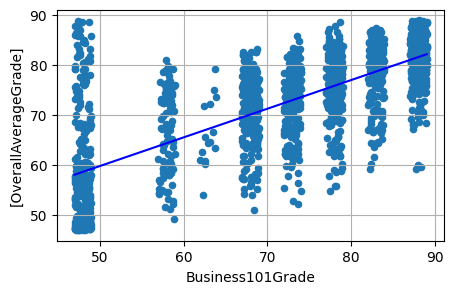

In [ ]:
feature_for_plot = "Business101Grade"
X_vis = student[[feature_for_plot]].values
y_vis = student[target].values

lin_vis = LinearRegression()
lin_vis.fit(X_vis, y_vis)

t0 = lin_vis.intercept_ [0]
t1 = lin_vis.coef_.ravel()[0]
print(f"θ0 = {t0:.2f}, θ1 = {t1:.2f}")

## Scatter of the data
student.plot(
    kind="scatter",
    x=feature_for_plot,
    y=target,
    figsize=(5, 3),
    grid=True
)

# Regression line
x_min = student[feature_for_plot].min()
x_max = student[feature_for_plot].max()
X_line = np.linspace(x_min, x_max, 100)

plt.plot(X_line, t0 + t1 * X_line, "b")
plt.show()

## ***Make predictions***
 > ### Predictions vs reality on the **training set**

In [ ]:
y_train_pred = lin1.predict(X_train_encoded)

print("First 5 predictions on training set:")
print(y_train_pred[:5])

print("\nFirst 5 actual values on training set:")
print(y_train[:5])

First 5 predictions on training set:
[[53.95134505]
 [77.8908588 ]
 [56.30823691]
 [67.37233623]
 [52.84738222]]

First 5 actual values on training set:
      OverallAverageGrade
1530                 55.2
323                  71.9
306                  48.4
882                  71.5
893                  47.0


 > ### Predictions vs reality on the **test set**

In [ ]:
y_test_pred = lin1.predict(X_test_encoded)

print("First 5 predictions on test set:")
print(y_test_pred[:5])

print("\nFirst 5 actual values on test set:")
print(y_test[:5])

First 5 predictions on test set:
[[79.89130454]
 [54.3021012 ]
 [69.03923938]
 [62.36225091]
 [72.98500848]]

First 5 actual values on test set:
      OverallAverageGrade
738                  79.3
473                  55.4
892                  71.4
1244                 49.0
349                  76.5


## ***Evaluate performance*** (RMSE)

In [ ]:
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Training RMSE: 7.058682082797729
Test RMSE: 6.786506016482184


### Training and test RMSE values are very similar => Model generalizes reasonably well to unseen data.